### ***Udacity Project 5: Communicate Data Findings***

# Ford GoBike Data Explanation

### by Kayin Patton

## Overview

I will be gathering, assessing, cleaning, and then visualizing explanatorily a Ford GoBike data set provided by Udacity. The Ford GoBike is a public bike sharing system in San Francisco, East Bay, and San Jose. The system launched on June 28, 2017 as a means to make commuting in the bay area much more accessible. Ford Motor Company partnered up with each township to ensure residents could get around with ease!

### Investigation Overview:

In the overall investigation I will be exploring the time spent, distance traveled, and ages of each member of this bike sharing system. I will specifically be looking into the ages and distance traveled of each member, but will be exploring all aspects of this data to attempt to get a wide, yet also thorough view of this dataset.

### Dataset Overview:

I chose this dataset specifically because I am an avid bike rider, and often wonder if systems like this are useful in any way. Combined with my interest in urban planning, it was a no brainer. I need to do figure out how to calculate the ages of each rider currently, and then do the same for distance. This way I'll be able to see all of the strands of this specific thread of the datasets rope.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# displaying maximum rows and columns to be able to properly see all of the data
pd.set_option('display.max_columns', 16)
pd.set_option('display.max_rows', 183412)

In [2]:
# loading dataset
trip = pd.read_csv('201902-fordgobike-tripdata.csv')

print(trip.shape)
print(trip.dtypes)
print(trip.head(5))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [3]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# changing datatypes
# converting 'member_gender' and 'user_type' to categorical dtypes
ordinal_var_dict = {'user_type' : ['Subscriber', 'Customer'],
                    'member_gender' : ['Male', 'Female', 'Other']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    trip[var] = trip[var].astype(ordered_var)
    
# converting start_time and end_time to datetime dtypes
trip.start_time = pd.to_datetime(trip.start_time)
trip.end_time = pd.to_datetime(trip.end_time)

# converting bike_share_for_all_trip to bool
trip.bike_share_for_all_trip = (trip.bike_share_for_all_trip == 'Yes')

# converting start_station_name and end_station_name to string dtypes
trip['start_station_name'] = trip['start_station_name'].astype(str)
trip['end_station_name'] = trip['end_station_name'].astype(str)

In [5]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

So it looks like there are 183,412 bike trips recorded in this dataset. Luckily there are 16 columns of data for me to play around with. I made sure I converted all of the non-string datatypes to their respective datatypes (ex: `user_type` was an object and is now a categorical datatype) with the exception of object to string as either way it will remain as an object. 

The columns are as follows:
    
    1. `duration_sec`
    2. `start_time` 
    3. `end_time`
    4. `start_station_id`
    5. `start_station_name`
    6. `start_station_latitude`
    7. `start_station_longitude`
    8. `end_station_id`
    9. `end_station_name`
    10. `end_station_latitude`
    11. `end_station_longitude`
    12. `bike_id`
    13. `user_type`
    14. `member_birth_year`
    15. `member_gender`
    16. `bike_share_for_all_trip`
    
    
### What is/are the main feature(s) of interest in your dataset?

Two main variables stand out to me when I look at the data thus far. Trip duration and age seem to be the most unique numerical variables. Diving into these two variables would be a great first step!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think a big factor might be help would be finding out what the distance of each ride would be. One **could** assume that the duration of the trip and the distance would be directly cause/effect. Furthermore, I'd like to see how the member's age relates to both distance and duration of the trip.

## Univariate Exploration 

First I'm going to add a quick function to make titling my plots much easier!

In [6]:
def myPlt(title, xvar, yvar):
    plt.figure(figsize = [14.70, 8.27])
    plt.title(title)
    plt.xlabel(xvar)
    plt.ylabel(yvar);

### Age

In this section I'd like to take a look the riders' ages. I'm definitely going to have to create a new column as there is no age column. So I'll be taking the already existing `member_birth_year` and subtracting each rider's birth year from 2021 (this year).

In [7]:
trip['member_birth_year'].head()

0    1984.0
1       NaN
2    1972.0
3    1989.0
4    1974.0
Name: member_birth_year, dtype: float64

In [8]:
trip.member_birth_year.value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
1992.0     8250
1987.0     8018
1986.0     7973
1994.0     7660
1995.0     7423
1985.0     7028
1984.0     6562
1983.0     5954
1980.0     5024
1982.0     4990
1996.0     4640
1981.0     4345
1979.0     3756
1997.0     3481
1998.0     3208
1978.0     2830
1977.0     2725
1974.0     2633
1999.0     2528
1975.0     2503
1976.0     2442
1973.0     2080
1968.0     1928
1971.0     1924
1972.0     1909
2000.0     1678
1970.0     1590
1965.0     1546
1969.0     1414
1967.0     1315
1964.0     1189
1963.0     1151
1966.0      989
1962.0      956
1961.0      821
1960.0      807
1957.0      807
1959.0      624
1958.0      517
1956.0      392
1954.0      301
1952.0      189
1951.0      180
1950.0      178
1953.0      158
1947.0      135
1955.0      134
1945.0      105
1949.0       99
1931.0       89
1900.0       53
1948.0       51
2001.0       34
1943.0       30
1942.0       21
1933.0       20
1946.0       19
1902.0  

It looks like I've got to clean the `age` data up. So I'll be getting rid of the trips with NaN birth years, and birth years no earlier than 1940, as there are a number of years on this list that might not be entirely possible (of course I do not want to be ageist in any way. The data would just be cleaner to have a cut off year).

Then I'll make a new column, calculating the age by subtracting this year from the `member_birth_year`, and name it `age`. 

In [9]:
# removing rows with NaN years
trip = trip[trip['member_birth_year'].notna()]

# removing rows with birth years less than 1940
trip.drop(trip[trip.member_birth_year <= 1940.0].index, inplace = True)

In [10]:
trip.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,False


In [11]:
# adding new age column
# subtracting 2021 (this year) from 'member_birth_year'

trip['age'] = (2021 - trip['member_birth_year'])
print(trip['age'].dtype)
trip.head()

float64


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,...,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,...,37.794231,-122.402923,4902,Customer,1984.0,Male,False,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,...,37.786375,-122.404904,5905,Customer,1972.0,Male,False,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,...,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,...,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,...,37.798014,-122.405950,5200,Subscriber,1959.0,Male,False,62.0


In [12]:
trip['age'] = trip['age'].astype(int)

In [13]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174944 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174944 non-null  int64         
 1   start_time               174944 non-null  datetime64[ns]
 2   end_time                 174944 non-null  datetime64[ns]
 3   start_station_id         174749 non-null  float64       
 4   start_station_name       174944 non-null  object        
 5   start_station_latitude   174944 non-null  float64       
 6   start_station_longitude  174944 non-null  float64       
 7   end_station_id           174749 non-null  float64       
 8   end_station_name         174944 non-null  object        
 9   end_station_latitude     174944 non-null  float64       
 10  end_station_longitude    174944 non-null  float64       
 11  bike_id                  174944 non-null  int64         
 12  user_type       

In [14]:
def age_hist():
    #plotting
    bins = np.arange(20, trip['age'].max()+5, 5)
    plt.hist(trip['age'], bins = bins)

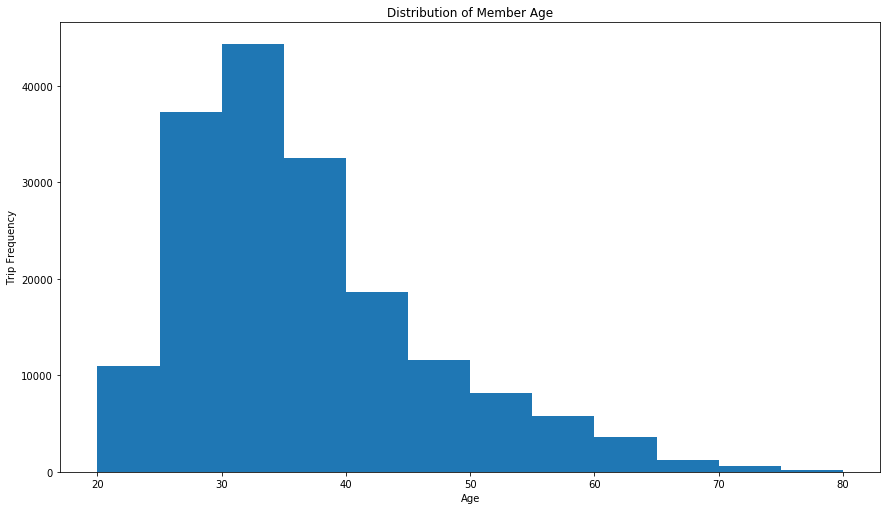

In [15]:
myPlt("Distribution of Member Age", "Age", "Trip Frequency");
age_hist()

I don't really feel like I'm getting to much info from this histogram, so I'm going to try and scale it, so we can get a more accurate view on the ages with the most trips, and the lowest member age.

In [16]:
def age_scale():    
    bins = np.arange(0, trip['age'].max() + 1, 1)
    plt.hist(data = trip, x = 'age', bins = bins)
    plt.xlim((20, 80))

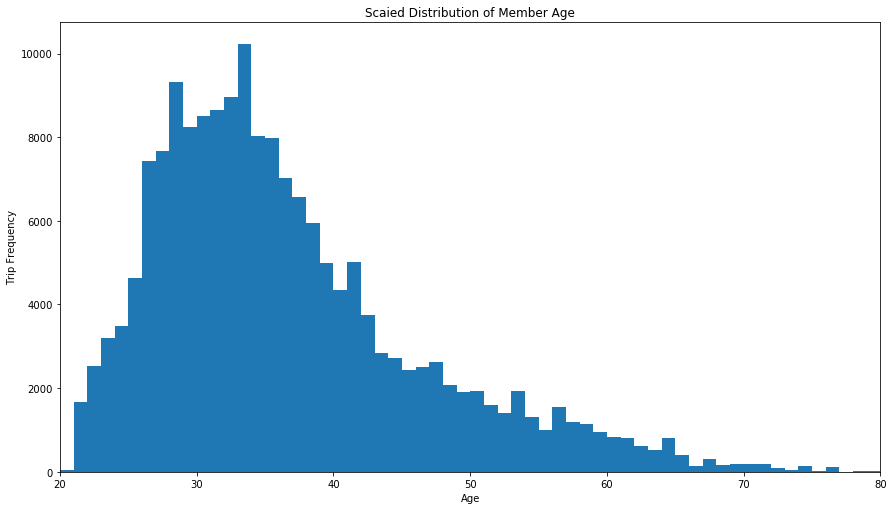

In [17]:
myPlt("Scaied Distribution of Member Age", "Age", "Trip Frequency");
age_scale()

I attempted to log scale `age`, but it was getting a bit convoluted. So, let's try custom scaling it! I am interested in getting a deeper look into this variable.

In [18]:
def age_cus():
    def sqrt_trans(x, inverse = False):
        if not inverse:
            return np.sqrt(x)
        else:
            return x ** 2
        
    bin_edges = np.arange(0, sqrt_trans(trip['age'].max()) + 1, 1)
    plt.hist(trip['age'].apply(sqrt_trans), bins = bin_edges)
    tick_locs = np.arange(0, sqrt_trans(trip['age'].max()) + 1, 1)
    plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));

### Age Distribution

Without a formal deep dive into these charts, you can already see that the age range for riders is wide! The initial histogram was helpful because it gave me a macro idea as to what the age range was, but I needed to see more. So, I decided to scale the initial histogram to try and get a more accurate view at where the majority age of riders were. As I had thought, and expected frankly, this variable is also unimodial. It looks like the majority of riders are in between ages 25 and 35 with a tail ending somewhere around 75-80 years old. I think it's awesome older folks were getting exercise by way of city bikes!

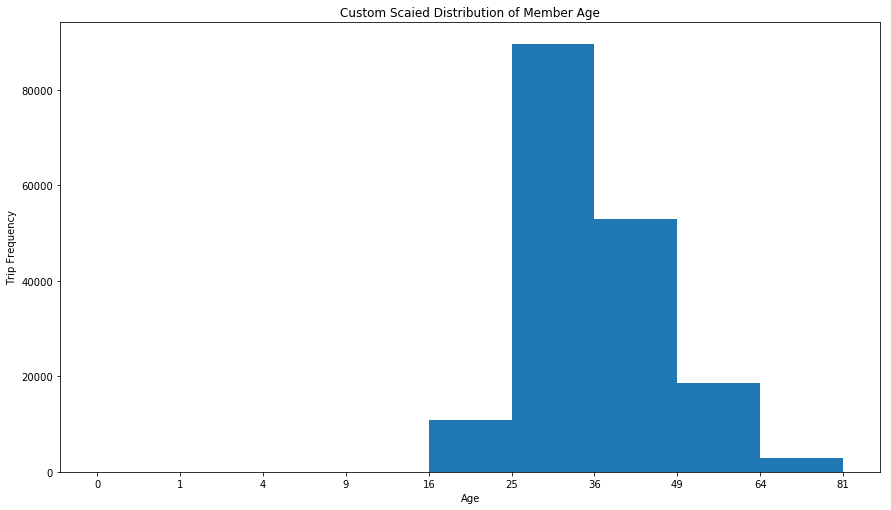

In [19]:
myPlt("Custom Scaied Distribution of Member Age", "Age", "Trip Frequency");
age_cus()

Okay, so, this is exactly what I was hoping to find with this exploration. You can see a more accurate age range with ages as young as 18 and as old as 80. But even more so, you can see that the majority of riders were somewhere in between 25 and 36 years old.

### Distance

I am interested (as stated before) in how the distance of each trip actually affected the duration of the trips. I could also find out what the correlation between the amount of trips and the distance between start and end stations. I attempted to calculate distance during my cleaning phase; however, I felt it more appropriate to do so while introducing a new variable (because I am a sucker for epic introductions!).

In [20]:
# defining distance
def haversine_vector(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0) ** 2

    dist = 2 * np.arcsin(np.sqrt(haver_formula))
    miles = 3959 * dist

    return miles

#creating dataframes for both locations
global_distance = pd.DataFrame({
    'lat_start' : trip['start_station_latitude'],
    'lon_start' : trip['start_station_longitude'],
    'lat_end' : trip['end_station_latitude'],
    'lon_end' : trip['end_station_longitude']}, index = trip.start_station_id)
    
# resetting index
global_distance.reset_index(inplace = True)
        
    

In [21]:
trip['distance'] = haversine_vector(global_distance['lon_start'], global_distance['lat_start'], global_distance['lon_end'], global_distance['lat_end'])

In [22]:
trip.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,...,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,...,-122.402923,4902,Customer,1984.0,Male,False,37,0.658456
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,...,-122.404904,5905,Customer,1972.0,Male,False,49,0.279519
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,...,-122.444293,6638,Subscriber,1989.0,Other,False,32,2.816581
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,...,-122.248780,4898,Subscriber,1974.0,Male,True,47,0.717797
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,...,-122.405950,5200,Subscriber,1959.0,Male,False,62,0.722712


In [23]:
trip.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age,distance
count,174944.000000,174749.000000,174944.000000,174944.000000,174749.000000,174944.000000,174944.000000,174944.000000,174944.000000,174944.000000,160177.000000
mean,704.509574,139.024092,37.770794,-122.351263,136.643683,37.770989,-122.350839,4481.980182,1984.880888,36.119112,0.973466
std,1642.477572,111.651112,0.101124,0.118499,111.352470,0.101031,0.118064,1658.354801,9.869501,9.869501,0.717070
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1941.000000,20.000000,0.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3802.000000,1980.000000,29.000000,0.479126
50%,511.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397405,4959.000000,1987.000000,34.000000,0.779871
75%,789.000000,239.000000,37.797320,-122.282497,238.000000,37.797673,-122.285171,5505.000000,1992.000000,41.000000,1.408283
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,80.000000,5.545736


In [24]:
def dist_hist():
    bins = np.arange(1, trip['distance'].max() + 0.5, 0.5)
    plt.hist(trip['distance'], bins = bins)

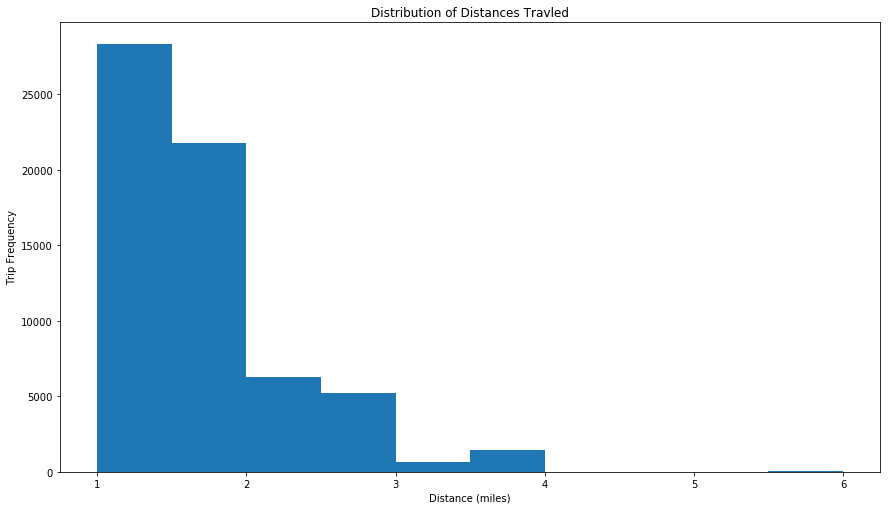

In [25]:
myPlt("Distribution of Distances Travled", "Distance (miles)", "Trip Frequency");
dist_hist()

It looks like the trips didn't seem to go any further than 6 miles, with a cliff of trips being around 1 mile long. This is very helpful! But, I want to dive deeper. Maybe, something else will present itself.

In [26]:
#plotting
def deep_hist():
    binsize = 0.2
    bins = np.arange(0, trip['distance'].max()+binsize, binsize)
    plt.hist(data = trip, x = 'distance', bins = bins)
    plt.show()

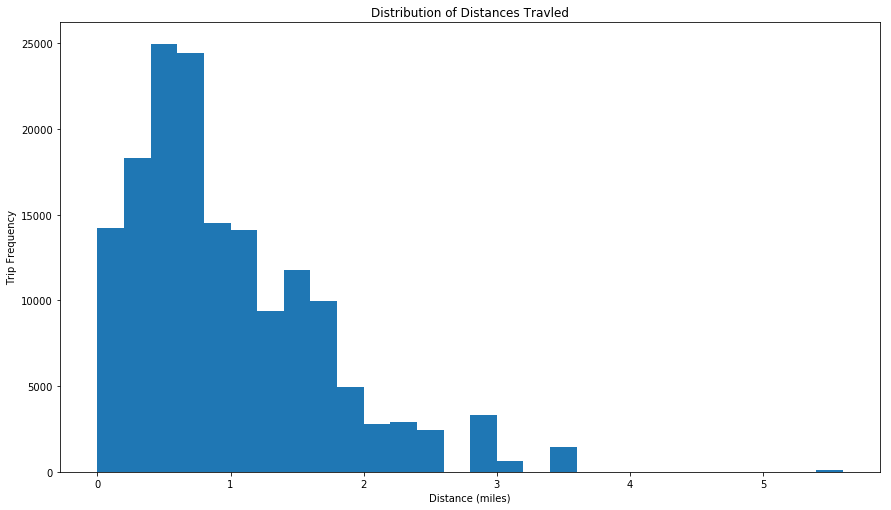

In [27]:
myPlt("Distribution of Distances Travled", "Distance (miles)", "Trip Frequency");
deep_hist()

I scaled the plot out to see exactly where the start and end of `distance`'s range. You can see though that a good amount of trips were actually less than a mile long, despite what we saw earlier. Let's look deeper!

In [28]:
def dis_sca():  
    bins = np.arange(0, trip['distance'].max()  + 0.1, 0.1)
    plt.hist(data = trip, x = 'distance', bins = bins)
    plt.xlim((0,6))

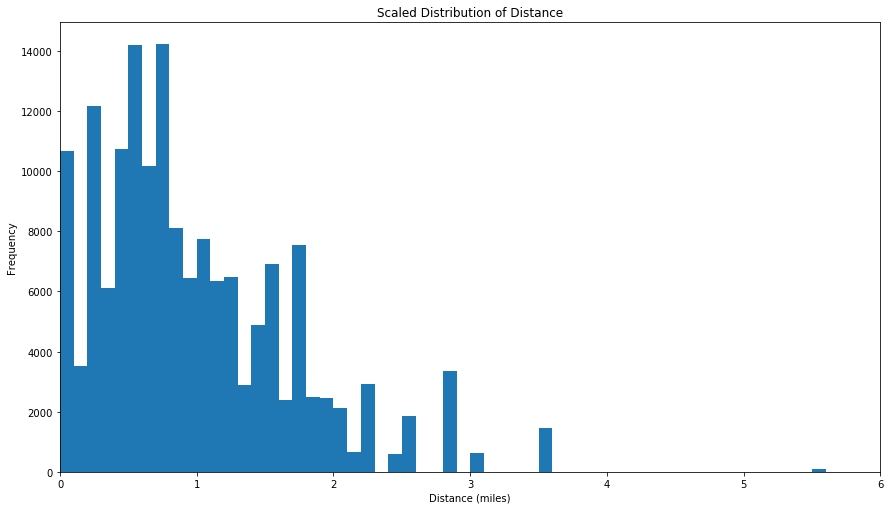

In [29]:
myPlt("Scaled Distribution of Distance", "Distance (miles)", "Frequency");
dis_sca()

Here you can see that I used a scaled plot, to see even further into this subsection of data. It's becoming clearer the further I dive, that `distance` is not what it seems entirely. 

In [30]:
def dis_log():   
    log_binsize = .035
    bins = 10 ** np.arange(.008825, np.log10(trip['distance'].max()) + log_binsize, log_binsize)
    
    plt.hist(data = trip, x = 'distance', bins = bins)
    plt.xscale('log')
    plt.xticks([0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2, 3, 4, 4.5, 5, 6], [0.3, '0.4', '0.5', '0.75', '1.0', '1.5', '2', '3', '4', '4.5', '5', '6'])
    plt.show()

### Distance Distribution

Unexpectedly, the distance variable is not unimodal like the previous two variables we've explored. When I dove into plotting a simple histogram, I initially thought it was going to be. It definitely looked like it was going to be. Even as I scaled the plot to see where the initial cliff started, the variable was looking to be an ordinal. However when I log scaled the plot I realized it was actually bimodal. You can also see that a good amount of trips were in between 1.5 miles and 2 miles. With what we know about the age and duration_sec variables, I'd say San Francisco has some very impressive commuter cyclists!

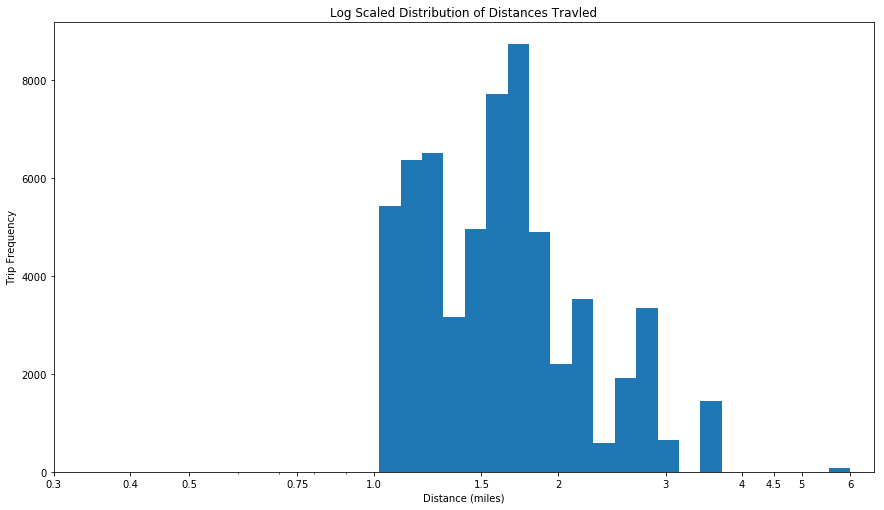

In [31]:
myPlt("Log Scaled Distribution of Distances Travled", "Distance (miles)", "Trip Frequency");
dis_log()

Now that I've log scale plotted for `distance`, I can see that there are a lot of trips taken in between 1.5 and 2 miles. This slightly bimodal plot shows that not many trips go further than 6 miles. Actually the furthest looks to be just under 6 miles, when I thought there might be some trips that went further. I wonder what the break down for rider types is? That could definitely shed some light on who's riding further!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I think the only truly unusual distribution was the log-scaled plot for `distance`. I expected there to be a unimodal trail, but it would make sense that the most traveled distance would be anywhere between 1 and 2 miles (if you think about tourists sight seeing, or folks using city bikes to travel to and from work).

I was extra proud of the fact that I was able to figure out how to calculate the distance between two GPS locations (start longitude and latitude, and end longitude and latitude) in order to see how far riders were traveling. I had to try a few different approaches for this portion of cleaning, which included a ton of trial and error. I also had to calculate the age of each rider/member. Both processes were challenging in some ways, but I felt it was necessary to calculate distance traveled for riders (as I believe its an important numerical variable to have), and to calculate each rider/member's age (as I believe its important to have a numerical variable directly reflecting the riders specifically, and not the trips).

### Extra Univariate Plotting

In [32]:
def cat_uni_plot():
    # plotting categorical variables

    fig, ax = plt.subplots(nrows = 2, figsize = [10, 8])

    default_color = sb.color_palette()[0]
    user = sb.countplot(data = trip, x = 'user_type', color = default_color, ax = ax[0])
    user.set(xlabel = 'User', ylabel = 'Trip Frequency')
    gender = sb.countplot(data = trip, x = 'member_gender', color = default_color, ax = ax[1])
    gender.set(xlabel = 'Gender', ylabel = 'Trip Frequency')
    plt.suptitle('Distributions of User Types and Gender per Trip', y = 1.04)
    plt.tight_layout()
    plt.show()

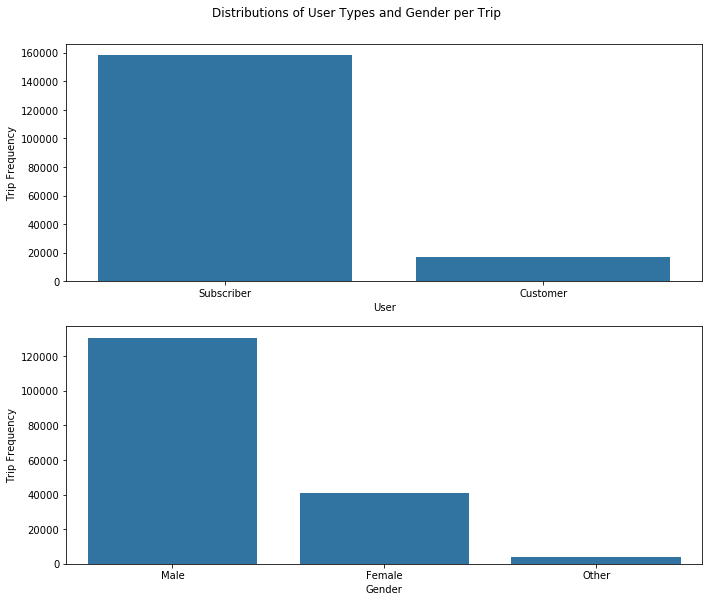

In [33]:
cat_uni_plot()

Here I wanted to give quick glimpse at the two categorical variables I'll be exploring. As you can see there are more Subscribers than Customers for `user_type` and for `member_gender` the plot suggests that the majority of trips were taken by male riders. Female riders and riders who identified as, Other, coming in a not-so-close second and third.

## Bivariate Exploration

In [34]:
def stackedplot():
    cat1_order = ['Male', 'Female', 'Other']
    cat2_order = ['Subscriber', 'Customer']

    plt.figure(figsize = [13, 5])

    # left plot: clustered bar chart, absolute counts
    plt.subplot(1, 2, 1)
    gender = sb.countplot(data = trip, x = 'member_gender', hue = 'user_type',
                 order = cat1_order, hue_order = cat2_order)
    gender.set(xlabel = 'Gender', ylabel = 'Trip Frequency')
    plt.legend()

    # right plot: stacked bar chart, absolute counts
    plt.subplot(1, 2, 2)

    baselines = np.zeros(len(cat1_order))
    # for each second-variable category:
    for i in range(len(cat2_order)):
            # isolate the counts of the first category,
            cat2 = cat2_order[i]
            inner_counts = trip[trip['user_type'] == cat2]['member_gender'].value_counts()
            # then plot those counts on top of the accumulated baseline
            plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
                    bottom = baselines)
            plt.xlabel('Gender')
            plt.ylabel('Trip Frequency')
            baselines += inner_counts[cat1_order]
            
    plt.suptitle('Distributions of User Types by Gender per Trip', y = 1.04)
    plt.tight_layout()
    plt.xticks(np.arange(len(cat1_order)), cat1_order)
    plt.legend(cat2_order)

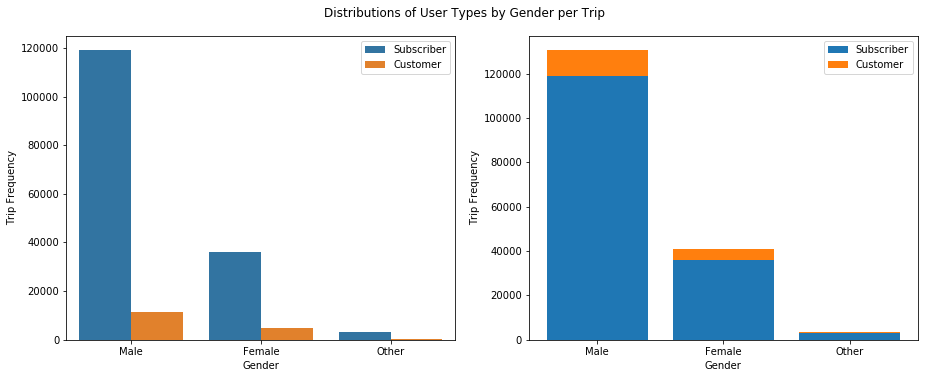

In [35]:
stackedplot()

I wanted to showcase a stacked plot to show the relationship between categorical variables `user_type` and `member_gender` I believe it's important to show these as I will be comparing these two variables against the numerical variables I explored earlier in this analysis.

### Member Gender:

Let's see how the numerical values are represented via `member_gender`

In [36]:
def barplot2():

    THRESHOLD = 80
    gender_frequency = trip['member_gender'].value_counts()
    idx = np.sum(gender_frequency > THRESHOLD)
    
    most_genders = gender_frequency.index[:idx]
    trip_sub = trip.loc[trip['member_gender'].isin(most_genders)]
    
    gender_means = trip_sub.groupby('member_gender').mean()
    comb_order = gender_means.sort_values('age', ascending = False).index
    
    # plotting
    base_color = sb.color_palette()[0]
    ax = sb.barplot(data = trip_sub, x = 'age', y = 'member_gender',
                color = base_color, order = comb_order, ci = 'sd')
    ax.set(xlabel = 'Age', ylabel = 'Member Gender')

In [37]:
def barplot3():
    
    THRESHOLD = 80
    gender_frequency = trip['member_gender'].value_counts()
    idx = np.sum(gender_frequency > THRESHOLD)
    
    most_genders = gender_frequency.index[:idx]
    trip_sub = trip.loc[trip['member_gender'].isin(most_genders)]
    
    gender_means = trip_sub.groupby('member_gender').mean()
    comb_order = gender_means.sort_values('distance', ascending = False).index
    
    # plotting
    base_color = sb.color_palette()[0]
    ax = sb.barplot(data = trip_sub, x = 'distance', y = 'member_gender',
                color = base_color, order = comb_order, ci = 'sd')
    ax.set(xlabel = 'Distance (mi)', ylabel = 'Member Gender')

In [38]:
def gender_age():
    plt.figure(figsize = [20, 9])
    base_color = sb.color_palette()[0]

    # left plot: violin plot
    plt.subplot(1, 3, 1)
    ax = sb.violinplot(data = trip, x = 'member_gender', y= 'age', inner = None,
                      color = base_color)
    ax.set_xlabel("Member Gender")
    ax.set_ylabel("Age")
    plt.xticks(rotation = 45); # include label rotation due to small subplot size


    # center plot: box plot
    plt.subplot(1, 3, 2)
    ax = sb.boxplot(data = trip, x = 'member_gender', y = 'age', color = base_color)
    ax.set_xlabel("Member Gender")
    ax.set_ylabel("Age")
    plt.xticks(rotation = 45);

    # right plot: adapted bar chart
    plt.subplot(1, 3, 3)
    ax = sb.barplot(data = trip, x = 'member_gender', y = 'age', color = base_color)
    ax.set(xlabel = 'Member Gender', ylabel = 'Age')
    plt.xticks(rotation = 45);
    
    plt.suptitle('Distributions of Member Genders by Age per Trip', y = 1.04)
    plt.tight_layout()
    plt.show


In [39]:
def gender_distance():
    plt.figure(figsize = [20, 9])
    base_color = sb.color_palette()[0]

    # left plot: violin plot
    plt.subplot(1, 3, 1)
    ax = sb.violinplot(data = trip, x = 'member_gender', y= 'distance', inner = None,
                      color = base_color)
    ax.set_xlabel("Member Gender")
    ax.set_ylabel("Distance (mi)")
    plt.xticks(rotation = 45); # include label rotation due to small subplot size


    # center plot: box plot
    plt.subplot(1, 3, 2)
    ax = sb.boxplot(data = trip, x = 'member_gender', y = 'distance', color = base_color)
    ax.set_xlabel("Member Gender")
    ax.set_ylabel("Distance (mi)")
    plt.xticks(rotation = 45);

    # right plot: adapted bar chart
    plt.subplot(1, 3, 3)
    ax = sb.barplot(data = trip, x = 'member_gender', y = 'distance', color = base_color)
    ax.set(xlabel = 'Member Gender', ylabel = 'Distance (mi)')
    plt.xticks(rotation = 45);
    
    plt.suptitle('Distributions of Member Genders by Distance per Trip', y = 1.04)
    plt.tight_layout()
    plt.show


### Member Gender vs Age:

Let's see how `age` is represented via `member_gender`.

After plotting the comparison between `member_gender` and `age`, I also noticed that again members who did not identify as male or female (despite there being more male members) had the highest age range. With some members almost as old as 40. The standard deviations for each gender category seem to be within the same range as well, having been as young as their mid 20's, and as old as their mid to late 30's.

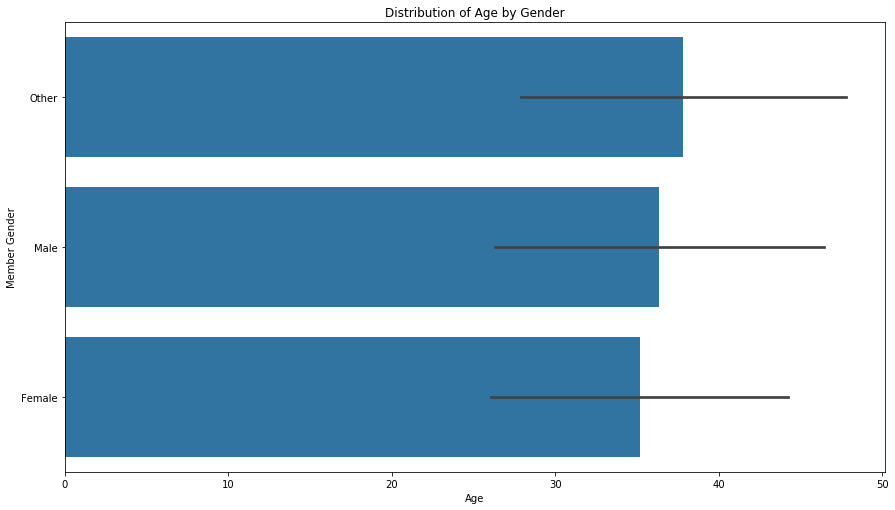

In [40]:
myPlt("Distribution of Age by Gender", "Age", "Gender");
barplot2()

I am seeing a pattern here. Again, the smallest category has the strongest relationship with this variable. You can see that  the age range for Other is wider, then the male age range, with the female age range have the least diversity.

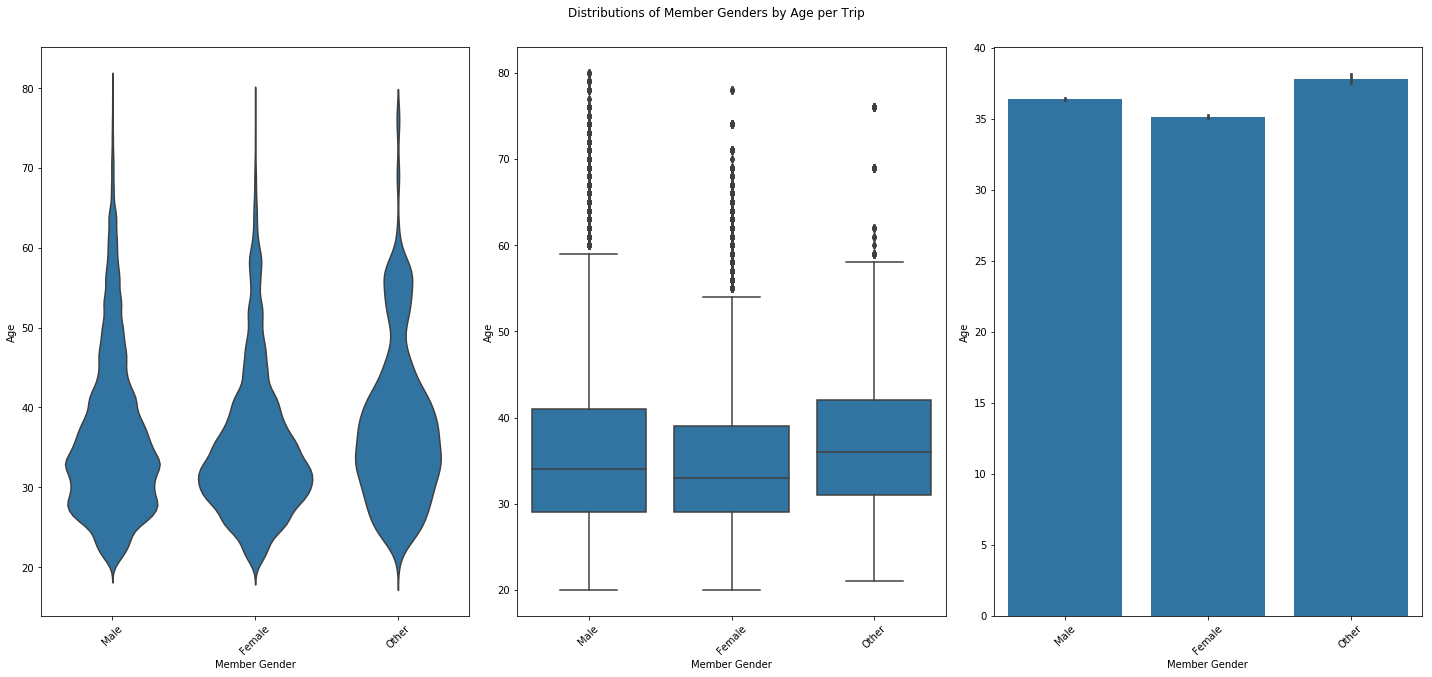

In [41]:
gender_age()

Again, you can see that in terms of age ranges that for male and female riders they start around the same age, and then male riders age's rise a bit higher. Whereas the Other gender type start much older, and ends up having older riders on average.

### Member Gender vs Distance:

Let's see how `distance` is represented via `member_gender`.

Finally when I plotted the relationship between `member_gender` and `distance` I found something specifically odd. Each gender category, as in, it didn't matter what each rider identified as in this case. This conclusion stems from the fact that each gender has traveled the same distances, or as close to the same distances as possible. Each bar looks equal to the last, and so do the standard deviations as well.

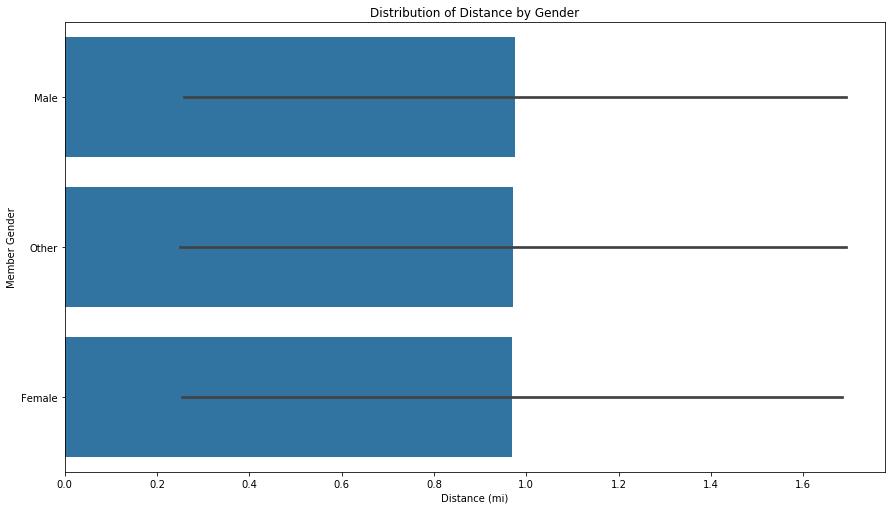

In [42]:
myPlt("Distribution of Distance by Gender", "Distance", "Gender");
barplot3()

Here you can see that all of the gender types have the same range of distance traveled per trip. The standard deviations look to be the same as well.

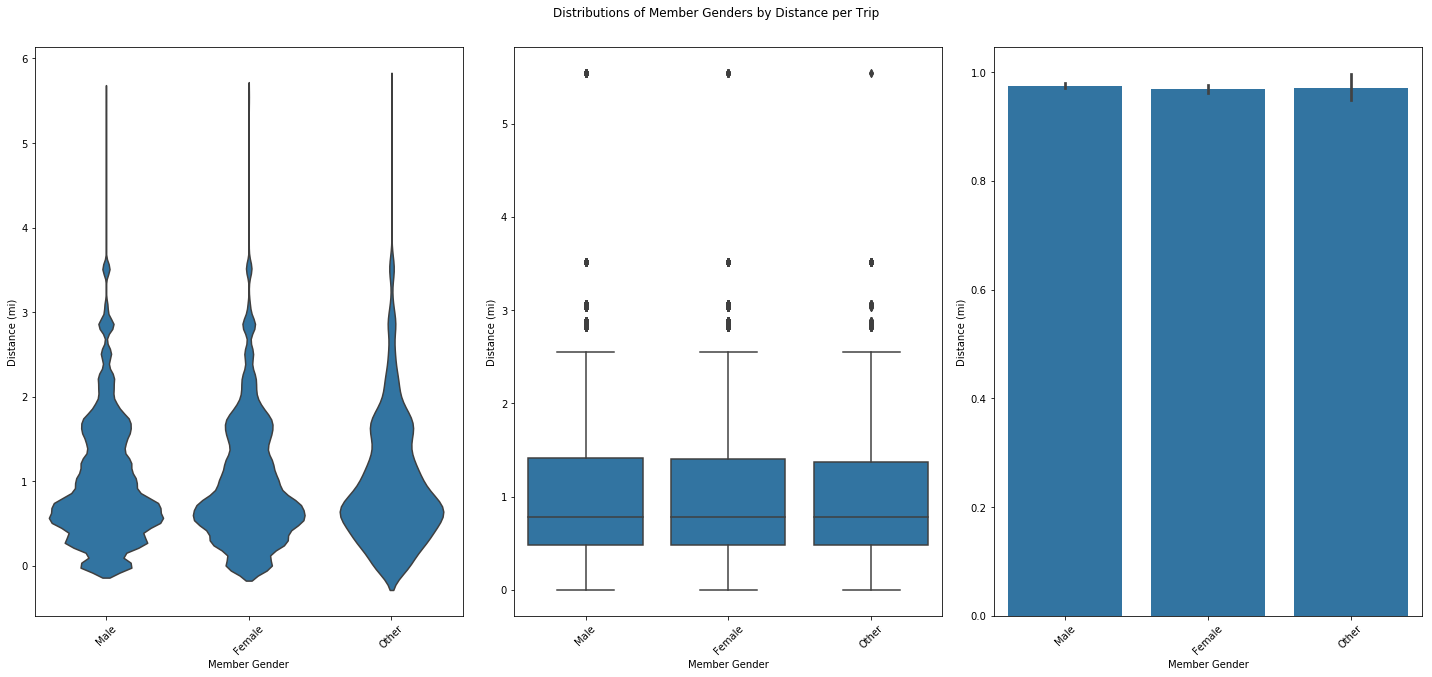

In [43]:
gender_distance()

Here you can see the previous finding supported. What I will say is that distance traveled represented by rider gender seems like it would be a great baseline for some multivariate plotting. I will again make a note of this and continue on with my exploration.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

During my bivariate exploration, I wanted to see how the `duration_sec`, `age`, and `distance` numerical variables would each reflectin the `user_type` and `member_gender` categorical variables. I plotted a stacked plot to provide some insight on how the two categorical variables related to each other. I noticed two important things here:
    
    1. There are more members categorized as _Subscriber_ than as _Customer_.
    2. The gender breakdown looks to be male dominant, suggesting that more riders who identified as male used the city-bike system for commuting

Even further than the second finding, it can be said (based on the data) that there were more Male Subscriber members than than all other demographic combinations combined, which I find very interesting, as I was hoping and had expected that it would as such, but not nearly as extreme as it looks. 


I will now be diving into each categorical variable's bivariate explorations:

1. **User Type Variable** - ***Faceted Plots***: 

    A. When plotting the relationship between `user_type` and `duration_sec` I noticed that this specific relationship seems to be most parallel with the prior categorical variable stacked plot. You can see that more Subscriber members rented bikes than Customer members; however, the duration_sec of each trip isn't affected by the user type specifically. As you can see both user types have unimodal distubtions.
    
    B. When plotting the relationship between `user_type` and `age` I found a similar distribution between Subscriber and Customer members. It looks like the average age range for Subscriber members is somewhere in between 25-35 years old; whereas, the Customer members looks like the average age range is 30-40 years old. Again, both user types have unimodal plot shapes.
    
    C. When plotting the relationship between `user_type` and `distance` I noted that the relationship again was parallel to the stacked categorical plot. What I did notice was that Subscriber members seemed to have traveled further distances than Customer members. I can also see that both user type distibutions are unimodal as well.


2. **Member Gender Variable** - ***Bar Plots***:

    A. When comparing `member_gender` with `duration_sec`, you can see that despite there being more male identifying members, members who identify as non-binary or chose not to identify at all ended up traveling the longest duration when it came to trips taken. With female members having trips with longer durations than male members as well.
    
    B. After plotting the comparison between `member_gender` and `age`, I also noticed that again members who did not identify as male or female (despite there being more male members) had the highest age range. With some members almost as old as 40. The standard deviations for each gender category seem to be within the same range as well, having been as young as their mid 20's, and as old as their mid to late 30's.
    
    C. Finally when I plotted the relationship between `member_gender` and `distance` I found something specifically odd. Each gender category, as in, it didn't matter what each rider identified as in this case. This conclusion stems from the fact that each gender has traveled the same distances, or as close to the same distances as possible. Each bar looks equal to the last, and so do the standard deviations as well.
    

    
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I did NOT observe anything specifically interesting outside of the main features unfortunately. I attribute this to having found a good deal of points of interest having explored the main features so thoroughly.

### Extra Bivariate Plotting

In [44]:
trip['duration_sec'] = trip['duration_sec'].apply(pd.to_numeric)
trip['age'] = trip['age'].apply(pd.to_numeric)
trip['distance'] = trip['distance'].apply(pd.to_numeric)

In [45]:
trip['duration_sec'] = trip['duration_sec'].replace(np.nan, 0.0)
trip['age'] = trip['age'].replace(np.nan, 0.0)
trip['distance'] = trip['distance'].replace(np.nan, 0.0)

In [46]:
numeric_vars = ['duration_sec', 'age', 'distance']
categoric_vars = ['user_type', 'member_gender']

In [47]:
def num_varGrid():
    samples = np.random.choice(trip.shape[0], 10000, replace = False)
    trip_samp = trip.reindex(columns = numeric_vars)

    g = sb.PairGrid(data = trip_samp, vars = numeric_vars)
    g = g.map_diag(plt.hist, bins = 20);
    g.map_offdiag(plt.scatter)
    replacements = {'duration_sec': 'Duration (sec)', 'age': 'Age',
                'duration_sec': 'Duration (sec)', 'age': 'Age',
                'distance': 'Distance (mi)', 'distance': 'Distance (mi)'}

    for i in range(3):
        for j in range(3):
            xlabel = g.axes[i][j].get_xlabel()
            ylabel = g.axes[i][j].get_ylabel()
            if xlabel in replacements.keys():
                g.axes[i][j].set_xlabel(replacements[xlabel])
            if ylabel in replacements.keys():
                g.axes[i][j].set_ylabel(replacements[ylabel])
     
    g.fig.suptitle('Numerical Variable Distribution', y = 1.04)
            

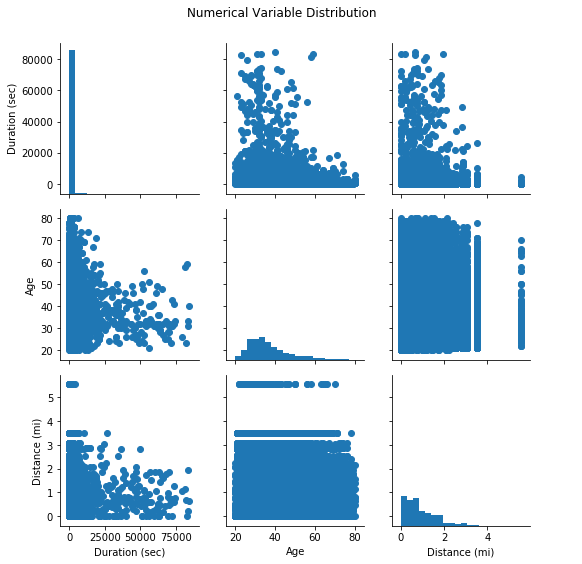

In [48]:
num_varGrid()

You can see here, I wanted to show a grid of bivariate plots for each numerical variable against another. In the first column of plots you can see `duration_sec`'s relationship with its numerical variable group mates. The same for `age` and `distance`. This was to showcase a quick glimpse at what I've been exploring thus far numerically.

## Multivariate Exploration

In [49]:
trip['distance_cat'] = trip['distance'].apply(lambda x: ((x*10//10)))
trip['distance_cat'].unique()

array([0., 2., 1., 3., 5.])

In [50]:
def lineplot2():
    def mean_poly(x, y, bins = 10, **kwargs):
        """ Custom adapted line plot code. """
        # set bin edges if none or int specified
        if type(bins) == int:
            bins = np.linspace(x.min(), x.max(), bins+1)
        bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

        # compute counts
        data_bins = pd.cut(x, bins, right = False,
                           include_lowest = True)
        means = y.groupby(data_bins).mean()

        # create plot
        plt.errorbar(x = bin_centers, y = means, **kwargs)

    bin_edges = np.arange(0.25, trip['age'].max()+ 1, 1)
    g = sb.FacetGrid(data = trip, hue = 'member_gender', height = 5)
    g.map(mean_poly, "age", "distance", bins = bin_edges)
    g.set_ylabels('Distance (mi)')
    g.set_xlabels('Age')
    
    g.add_legend(title = 'Gender')
    g.fig.suptitle('Distribution of Gender by Age and Distance', y = 1.04)

In [51]:
def facetgrid2():
    ax = sb.stripplot(data = trip.sample(trip.shape[0]//10, random_state = 42),
                 x = 'distance_cat', y = 'age', hue = 'member_gender',
                 jitter = 0.035, dodge = True)
    ax.set(xlabel = 'Distance (mi)', ylabel = 'Age')
    ax.legend(['Male', 'Female', 'Other'], title = 'Gender')

### Gender vs. Age vs. Distance: FacetGrid - Scatter

We can start to see the relationship between age and gender and that relationship with distance traveled. Despite what we've seen thus far, it looks like male riders have a wider range of ages but a small range of distance traveled. With female riders having an adverse reaction to being compared to age and distance. You can see that almost like the Other gender, female riders have a smaller range of rider ages (not by much though), but a much wider range of distance traveled. I wonder what makes the data so opposite for these variables...

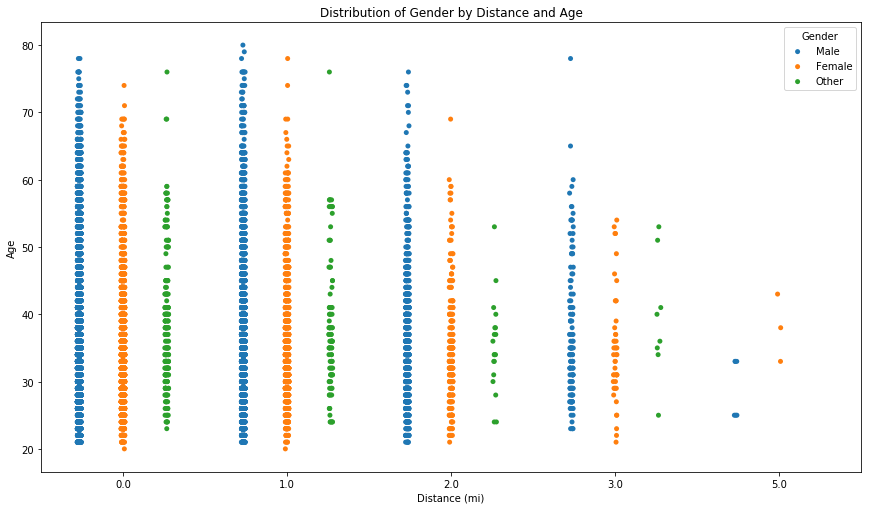

In [52]:
myPlt("Distribution of Gender by Distance and Age", "Distance (mi)", "Age");
facetgrid2()

### Gender vs. Age vs. Distance: Polished FacetGrid
Here's a deeper dive!

In [53]:
def polishplot2():
    type_colors = {'Male' : '#f70000', 'Female' : '#0008f7', 'Other' : '#198700'}
    
    # plotting
    ax = sb.stripplot(data = trip.sample(trip.shape[0]//10, random_state = 42),
                 x = 'distance_cat', y = 'age', hue = 'member_gender',
                 jitter = 0.035, dodge = True, palette = type_colors)
    x_ticks = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, .75, 1, 2, 3, 4, 5, 6]
    ax.set(xscale = 'log')
    ax.set(xticks = x_ticks, xticklabels = x_ticks)
    ax.set(xlabel = 'Distance (mi)', ylabel = 'Age')
    ax.legend(['Male', 'Female', 'Other'], title = 'Gender')

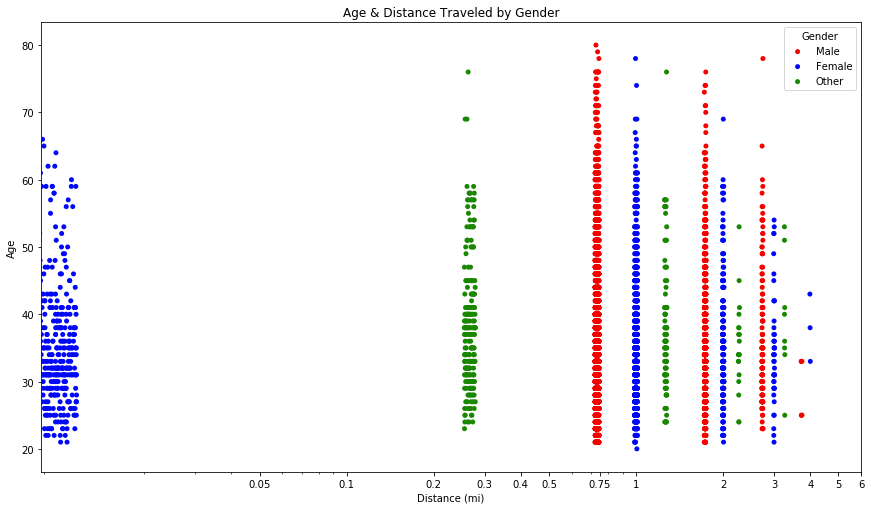

In [54]:
myPlt("Age & Distance Traveled by Gender", "Distance (mi)", "Age")
polishplot2()

Here's something interesting about the gender types. They are rarely unable to surprise me! You can see that more female riders around 40 or younger took most of the shortest distance trips. With male riders having the bulk of their trips in the 0.75 to 1 mile range. I was expecting the other gender type to have a stronger reaction to age vs. distance; however, you can see in this log scaled facetgrid, that is not the case.

### Gender vs. Age vs. Distance: FacetGrid - Line

As I dive deeper into this you can see that something is really driving the gender type Other to be so volatile. I at first attributed this to be an outlier, and how some rules don't entirely apply. However, I'd also like to attribute this to potentially being driven by another categorical variable.

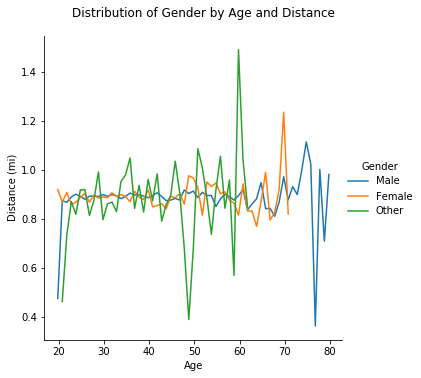

In [55]:
lineplot2()

Here you can see more of the new relationship pattern being explored. Look at how volatile the green line is (Other). It is suggesting that older riders in the Other category rider further than other category. Funnily enough, the older male riders get, the shorter the distance of their trips are. Female riders seem to have the most steady age to distance traveled ratio.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I'm sure by this point, my multivariate exploration will sort of seem like an explanatory section. For the most part... it will be. However, there are some key points I'd like to explore. Mainly the amount of members who chose not to identify (whether its in silent protest of lack of representation, or just opting out of filling out that portion for lack of personal importance) as male or female. The "other" gender type in this dataset has specifically the highest standard deviation when representing two of the numerical values, but is also the smallest category out of the `member_gender` value set. Likewise with the `user_type` value set. Though there are more Subscribers than Customers, the standard deviation when compared against two of the numerical variables.

You can see in my violinplot, that both "Customer" user type and "Other" gender type have the highest standard deviation. With wide begininnings in `age` and `distance` variables, and long tails towards the end of the plot. You can see practically the same findings in my pin, cluster bar, and line plots. Its pretty apparent that in this case, the smaller numerical variable can have the most diverse dataset. 

I would say that the introduction of categorical variables to this exploration has definitely strengthened my initial univariate analysis by about 66% (mostly because when `duration_sec` is represented, it pretty much matches the very first categorical variable finding).

In [56]:
def heatmap2():
    cat_means = trip.groupby(['user_type', 'member_gender']).mean()['age']
    cat_means = cat_means.reset_index(name = 'age_avg')
    cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type',
                                values = 'age_avg')
    ax = sb.heatmap(cat_means, annot = True, fmt = '.3f',
               cbar_kws = {'label' : 'Avr. Age'})
    ax.set(xlabel = 'User Type', ylabel = 'Gender')

In [57]:
def heatmap3():
    cat_means = trip.groupby(['user_type', 'member_gender']).mean()['distance']
    cat_means = cat_means.reset_index(name = 'dis_avg')
    cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type',
                                values = 'dis_avg')
    ax = sb.heatmap(cat_means, annot = True, fmt = '.3f',
               cbar_kws = {'label' : 'Avg. Distance (mi))'})
    ax.set(xlabel = 'User Type', ylabel = 'Gender')

### Gender and User Type vs. Age: Heatmap

As you can see the rider gender, Other, is also driven by the type of user the rider is as well. If they are also a Subscriber they have higher average rider age. Which definitely explains the volatility from earlier, as I would assume that more folks aren't chosing a gender as to expedite the processes, or due to lack of representation.

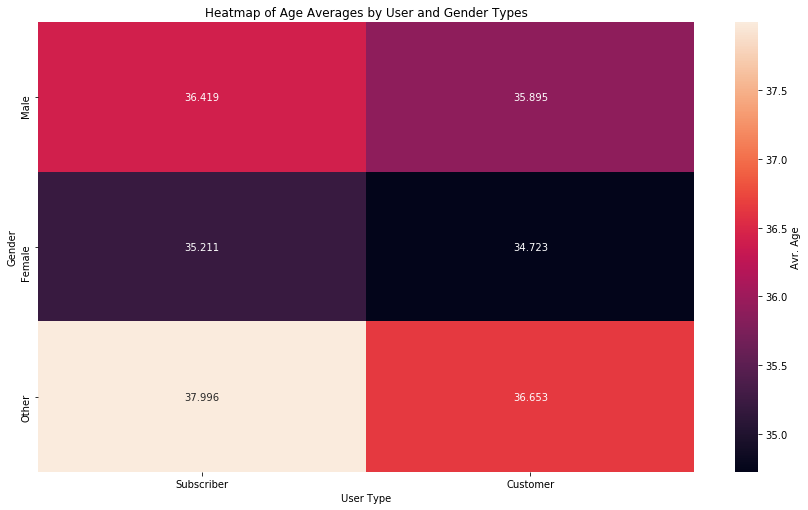

In [58]:
myPlt("Heatmap of Age Averages by User and Gender Types", "User Type", "Gender")
heatmap2()

In this heatmap you can see that the highest average age belongs to the other-gender, subscriber-user group. With the lowest average in ages being the female-gender, customer-user group.

### Gender and User Type vs. Distance: Heatmap

Now, here is where things are a bit interesting. While it does to some degree help explain why the data is so volatile for the gender, Other, it doesn't really give me much more than the heatmap above. What I can see here is that it looks like more male riders travel further if they opt out of subscribing to the system altogether. Which I find very interesting!

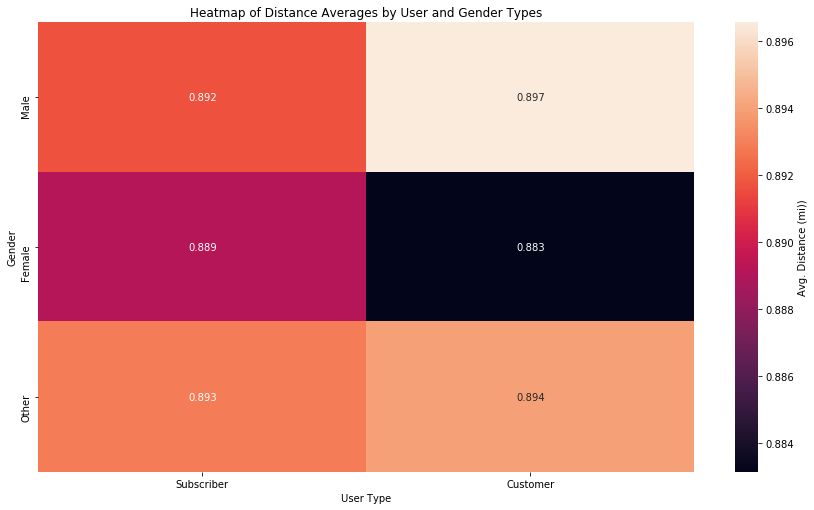

In [59]:
myPlt("Heatmap of Distance Averages by User and Gender Types", "User Type", "Gender")
heatmap3()

Lastly, you can see that the highest average of distance traveled belongs to the male customer group. Whereas the lowest average in distance traveled per trip is again the female customer group. What's most interesting about the distance heatmap is that each average for each is less than a mile. I wonder how many riders use the bike share system to get to and from work.

### Were there any interesting or surprising interactions between features?

I haven't really seen much that was entirely surprising shy of the minority values in this datasets group of categorical variables. As you can see in the heatmaps and facetgrid plots, the `Customer` member type, and the `Other` member-gender type seem to have a more diverse set of values. You can see throughout this project that both values have a much grander standard deviation than their respective counterparts. However, although I wasn't necessarily expecting this, I was ultimately not surprised.

Personally, the notion that an outlier group of variables would be more diverse than the majority set is not foreign to me.

In [ ]:
z